### Содержание
1. Открываем файл
2. Проверяем на адекватность текстовое описание
3. Очистка данных - пропуски и выбросы
3. Контроль качества
4. Отдельно работа с датой и временем
5. Кодирование - пять вариантов
6. Нормализаия - минмах или z
7. Дисбаланс

### Импорты библиотек

In [1]:
# pip install ipywidgets
import pandas as pd
from pandas_profiling import ProfileReport
## Библиотека для визуализации пропущенных данных в наборах данных
import missingno as msno

C:\Users\n3sm3\AppData\Local\Temp\ipykernel_23956\576564784.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [5]:
# pip install missingno
# !pip install openpyxl --upgrade

### Настройки вывода

In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format) 
# Уберем параметр максимального числа столбцов, что бы наглядно видеть все данные
pd.set_option('display.max_columns', None)

### Загружаем датасет

In [6]:
# Прописать через путь и названия файла и разные разделители
df = pd.read_excel('df_nan.xlsx')
df.sample(5)

,name,age,city,country,param4,param5,param6,param7,param8,param9,param10
157,Billy Mitchell,44.0,Bruchweiler-Barenbach,Germany,NaN,NaN,9.0,17345.0,3079.0,12.0,68.0
65,Jessica Moran,21.0,Maxdorf,Germany,114.0,11.0,12.0,98784.0,3020.0,12.0,74.0
47,Anita Thomas,18.0,Triftern,Germany,119.0,2.0,12.0,83385.0,3051.0,12.0,106.0
101,John Warren,26.0,Viani,Colombia,111.0,9.0,8.0,107539.0,3005.0,12.0,58.0
223,Gail Williams,35.0,Stonewall,Canada,108.0,8.0,12.0,NaN,3090.0,11.0,45.0


### Автоматический отчет

In [ ]:
# Автоматический отчет
# Не забудь, что действительно большие датасеты не помещаются в этот репорт
profile = ProfileReport(df, title="Pandas Profiling Report")
# запускаем показ профиля
# его надо сохранить 
# profile

### Очистка данных (пропуски)

Работа с пропусками
1. Подсчет пропусков
2. Теоретическая классификация пропусков - востановимые/невосстановимые
                                            случайные/неслучайные
Главная задача - не исказить данные
Методы работы с пропусками
1) Удаление
2) Отметка
3) Восстановление
                                       




In [7]:
df.isnull().sum()

name        0
age        25
city       12
country    13
param4     16
param5     20
param6     13
param7     26
param8     21
param9     14
param10     9
dtype: int64

In [ ]:
df.fillna(0)
# Замена пропущенных значений средними значениями
df['Цена'].fillna(df['Цена'].mean(), inplace=True)
df.fillna(df.mean())
# Удаление столбов где превышен порог пропусков
df.dropna(axis = 1, thresh=3)
# Удаление строк с пропущенными значениями в столбце "Цена"
df = df.dropna(subset=['Цена'])
#Заполнение пропущенных значений на основе дополнительной информации
df.loc[df['Модель'] == 'Outback', 'Цена'] = 17625

In [ ]:
# Замена пропущенных значений в столбце "Тип топлива" на наиболее часто встречающееся значение
mode_fuel_type = df['Тип топлива'].mode()[0]  # Вычисление моды (наиболее часто встречающегося значения)
df['Тип топлива'].fillna(mode_fuel_type, inplace=True)
# Присвоение пропускам специальной категории
df.fillna(999999)

In [ ]:
# Далее мы будем использовать функции isna и notna для обнаружения пропущенных значений.
# Почитай про разниу!!!!!!!!!

<Axes: >

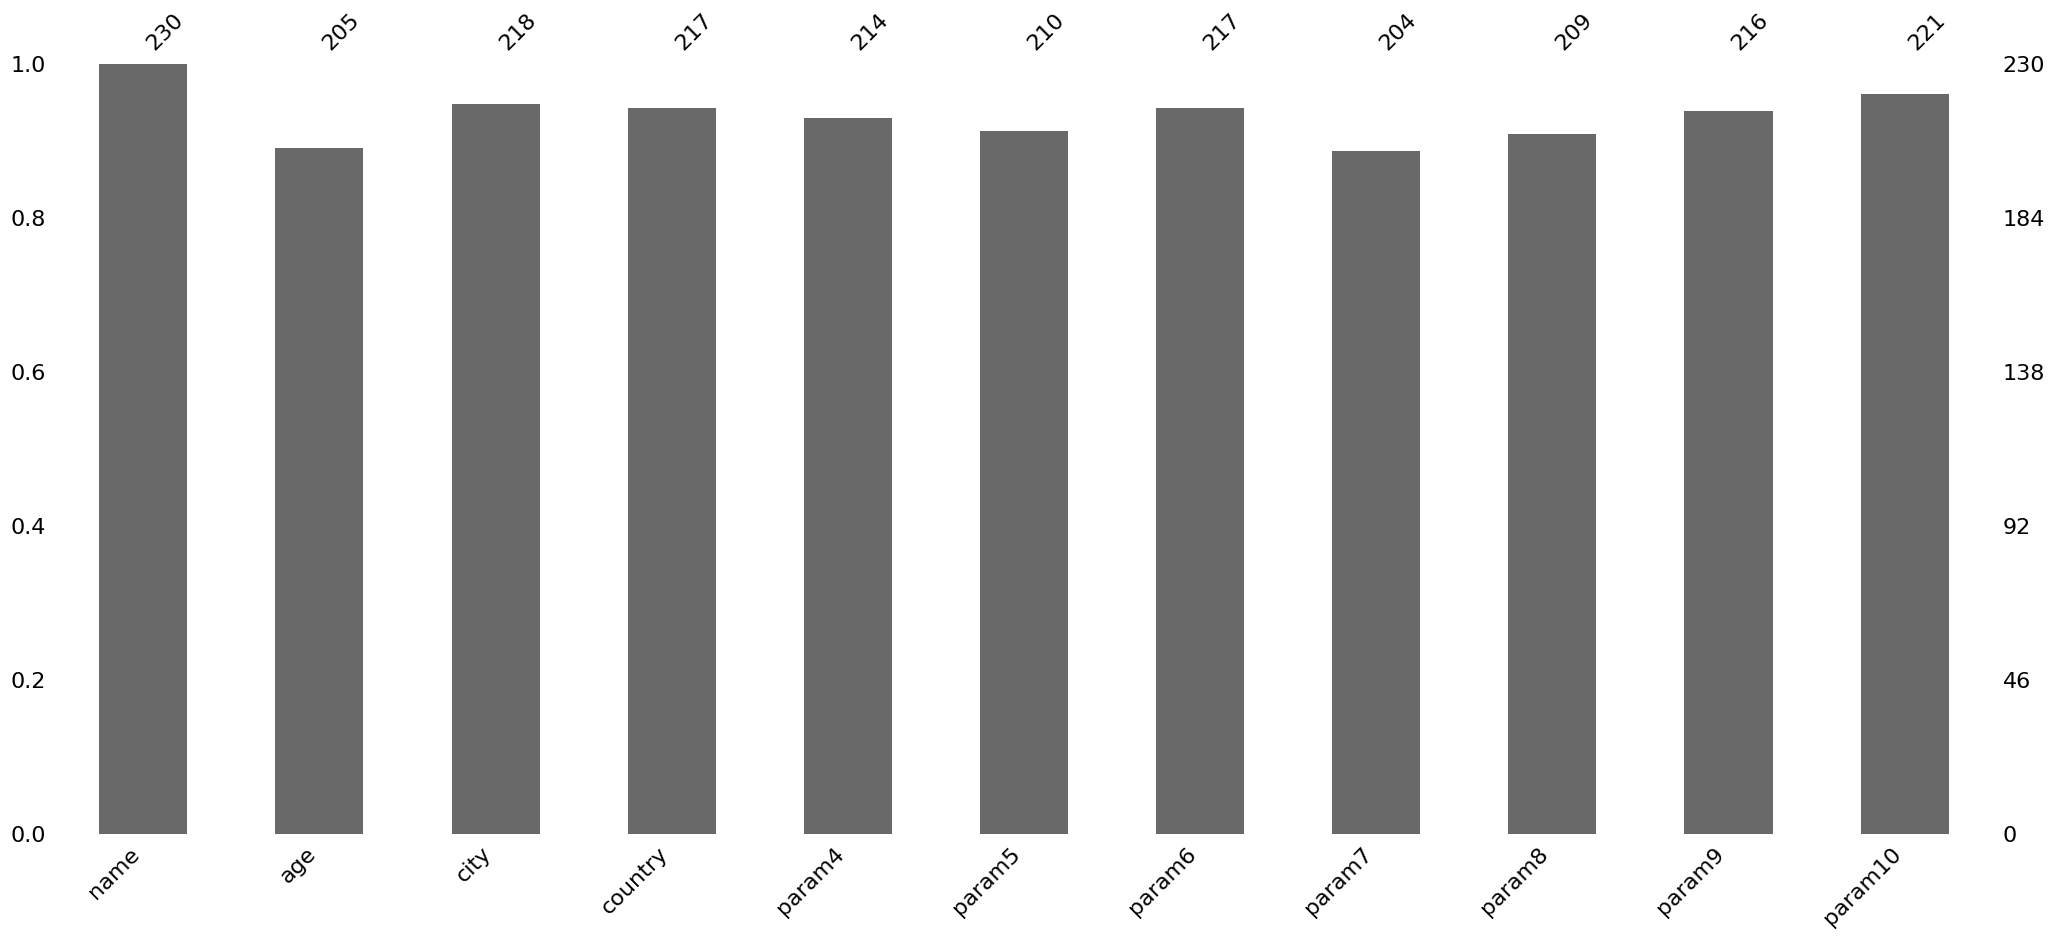

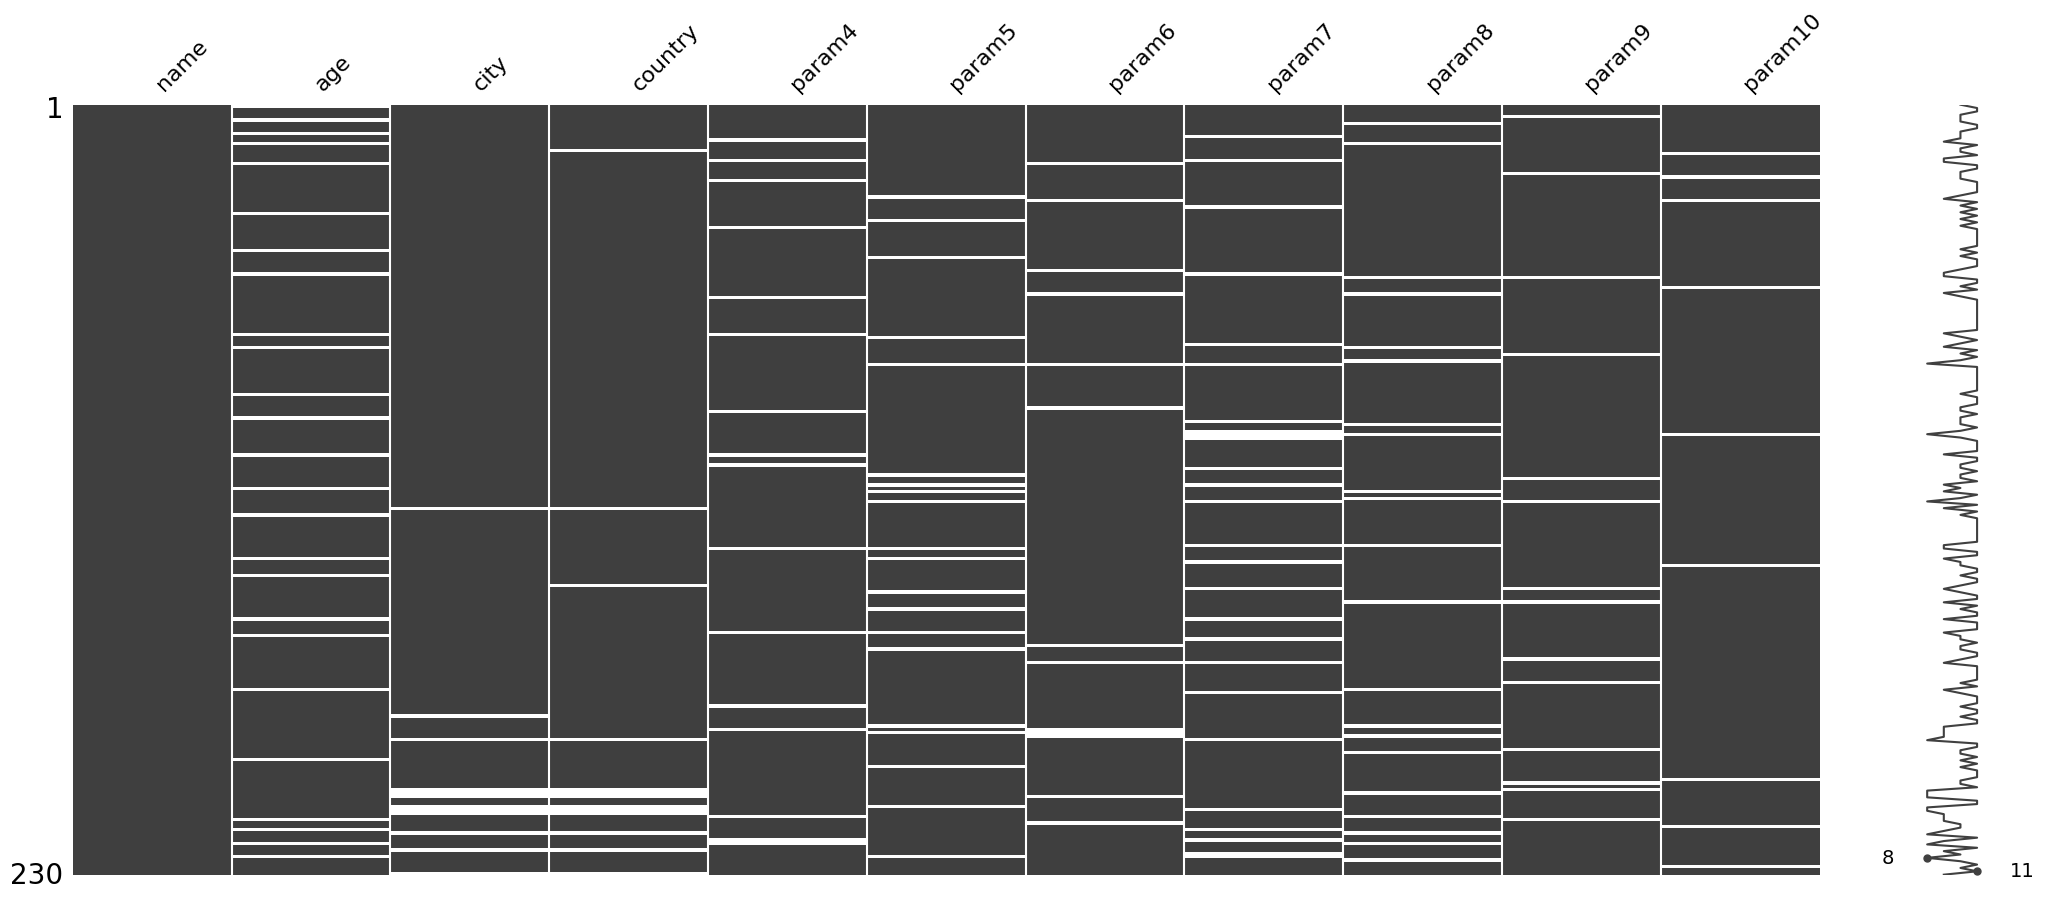

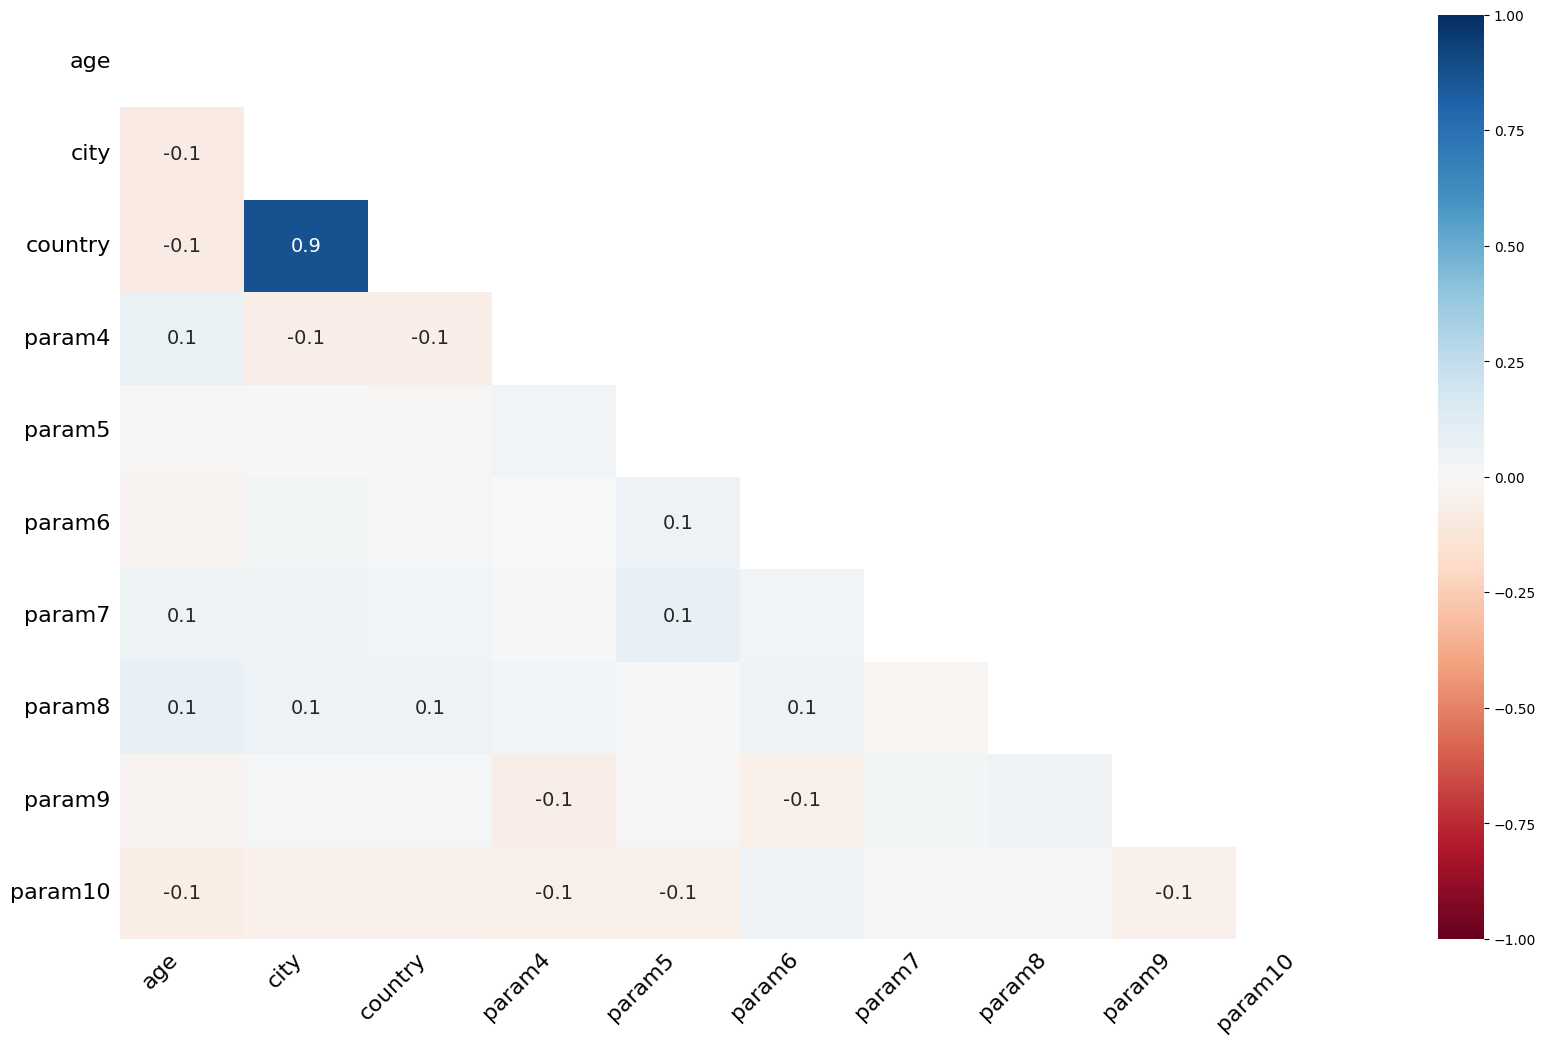

In [ ]:
# Спеиальная библиотечка для пропусков
msno.bar(df)
msno.matrix(df)
# кореляии между пропусками
msno.heatmap(df)